# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from kmeans.kmeans import kmeans
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.8666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0]

Accuracy:
0.96

Standard Deviation:
0.038873012632301994

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                8                0               0
Iris-versicolor            0               11               0
Iris-virginica             0                1              10
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-versicolor               11            0               1
Iris-setosa                    0            6               0
Iris-virginica                 0            0              12
                 Iris-virginica  Iris-setosa  Iris-versicolo

In [7]:
confusion_matrix_mean(knn_confusion_matrix_list)

,Iris-versicolor,Iris-virginica,Iris-setosa
Iris-versicolor,9,0,0
Iris-virginica,0,9,0
Iris-setosa,0,0,10


In [30]:
knn_confusion_matrix_list[1] # 1, 12

,Iris-versicolor,Iris-setosa,Iris-virginica
Iris-versicolor,9,0,2
Iris-setosa,0,9,0
Iris-virginica,0,0,10


# Showing dmc informations computed

In [5]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.9333333333333333, 0.9, 0.9, 0.8333333333333334, 0.8333333333333334, 0.9, 0.9, 0.8333333333333334, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.8666666666666667, 0.9333333333333333, 0.9, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]

Accuracy:
0.9133333333333333

Standard Deviation:
0.04521553322083511

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                8                0               0
Iris-versicolor            0               11               0
Iris-virginica             0                2               9
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-versicolor               10            0               2
Iris-setosa                    0            6               0
Iris-virginica                 1            0              11
                 Iris-virginica  Iris-setosa  Iris-versicolor


In [32]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,Iris-versicolor,Iris-virginica,Iris-setosa
Iris-versicolor,9,0,0
Iris-virginica,1,8,0
Iris-setosa,0,0,10


In [53]:
dmc_confusion_matrix_list[12]

,Iris-setosa,Iris-virginica,Iris-versicolor
Iris-setosa,11,0,0
Iris-virginica,0,8,1
Iris-versicolor,0,0,10


# Showing kmeans informations computed

In [6]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.8333333333333334, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0]

Accuracy:
0.9633333333333333

Standard Deviation:
0.04068851871911233

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                8                0               0
Iris-versicolor            0               11               0
Iris-virginica             0                0              11
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-versicolor               11            0               1
Iris-setosa                    0            6               0
Iris-virginica                 0            0              12
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virgini

In [ ]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

In [ ]:
kmeans_confusion_matrix_list[12]

# Choosing two columns from the last X_train and X_test to plot decision surface

In [7]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
147           6.5          3.0
14            5.8          4.0
67            5.8          2.7
130           7.4          2.8
31            5.4          3.4
..            ...          ...
25            5.0          3.0
91            6.1          3.0
61            5.9          3.0
73            6.1          2.8
38            4.4          3.0

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
12            4.8          3.0
116           6.5          3.0
107           7.3          2.9
140           6.7          3.1
45            4.8          3.0
136           6.3          3.4
69            5.6          2.5
44            5.1          3.8
29            4.7          3.2
26            5.0          3.4
58            6.6          2.9
113           5.7          2.5
93            5.0          2.3
78            6.0          2.9
11            4.8          3.4
90            5.5          2.6
102           7.1          3.0
19            5.1

# Training the models with the new dataset 2d

In [8]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

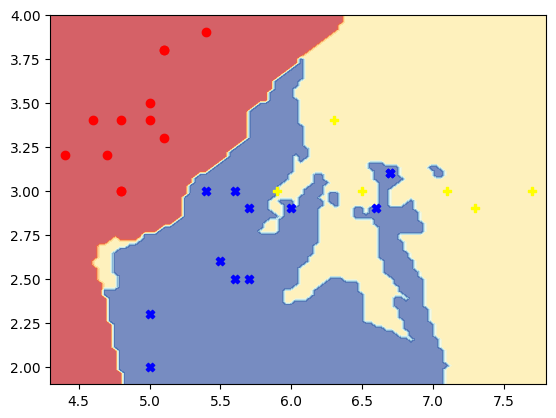

In [9]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

setosa = np.where(knn_y_pred == 'Iris-setosa')
virginica = np.where(knn_y_pred == 'Iris-virginica')
versicolor = np.where(knn_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting dmc decision surface

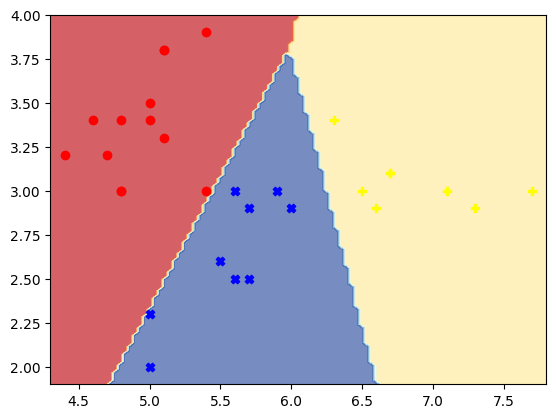

In [10]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(dmc_y_pred == 'Iris-setosa')
virginica = np.where(dmc_y_pred == 'Iris-virginica')
versicolor = np.where(dmc_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting kmeans decision surface

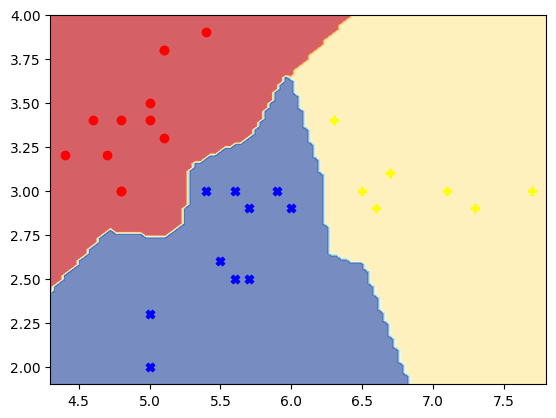

In [11]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

setosa = np.where(kmeans_y_pred == 'Iris-setosa')
virginica = np.where(kmeans_y_pred == 'Iris-virginica')
versicolor = np.where(kmeans_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()